In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv("sales_data.csv")

# Display first rows
print(df.head())

# Check structure
print(df.info())

# Check missing values
print("\nMissing values:\n", df.isna().sum())

   Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0        1052  2023-02-03       Bob  North       5053.97             18   
1        1093  2023-04-21       Bob   West       4384.02             17   
2        1015  2023-09-21     David  South       4631.23             30   
3        1072  2023-08-24       Bob  South       2167.94             39   
4        1061  2023-03-24   Charlie   East       3750.20             13   

  Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0        Furniture     152.75      267.22     Returning      0.09   
1        Furniture    3816.39     4209.44     Returning      0.11   
2             Food     261.56      371.40     Returning      0.20   
3         Clothing    4330.03     4467.75           New      0.02   
4      Electronics     637.37      692.71           New      0.08   

  Payment_Method Sales_Channel Region_and_Sales_Rep  
0           Cash        Online            North-Bob  
1           Cash        Re

In [5]:
df["Sale_Date"] = pd.to_datetime(df["Sale_Date"])
df = df.sort_values("Sale_Date")
df.set_index("Sale_Date", inplace=True)
df = df.dropna()

In [8]:
df["Year"] = df.index.year
df["Month"] = df.index.month
df["Day"] = df.index.day

In [9]:
plt.figure()
df["Sales"].plot()
plt.title("Sales Over Time")
plt.show()

KeyError: 'Sales'

<Figure size 640x480 with 0 Axes>

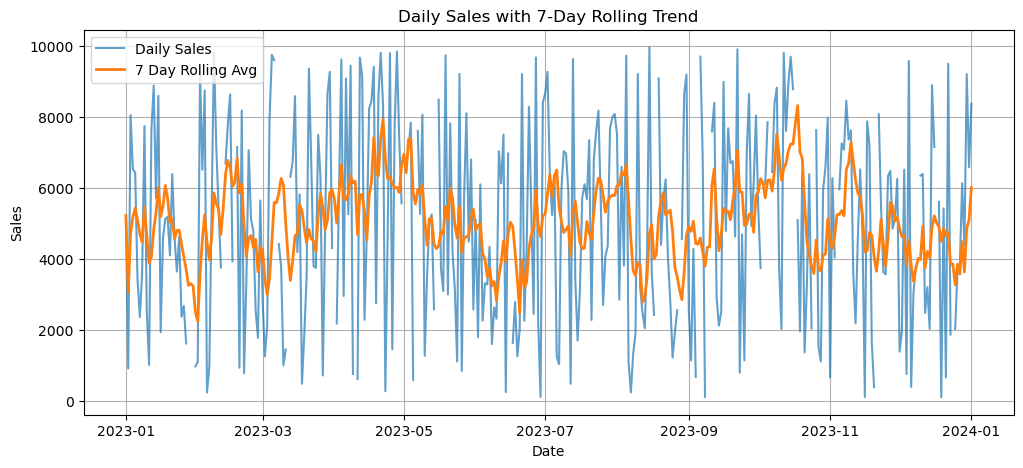

In [7]:
plt.figure()

plt.plot(ts.index, ts.values, label="Daily Sales", alpha=0.7)

plt.plot(ts.index, 
         ts.rolling(window=7, min_periods=1).mean().values,
         label="7 Day Rolling Avg",
         linewidth=2)

plt.title("Daily Sales with 7-Day Rolling Trend")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.legend()
plt.show()

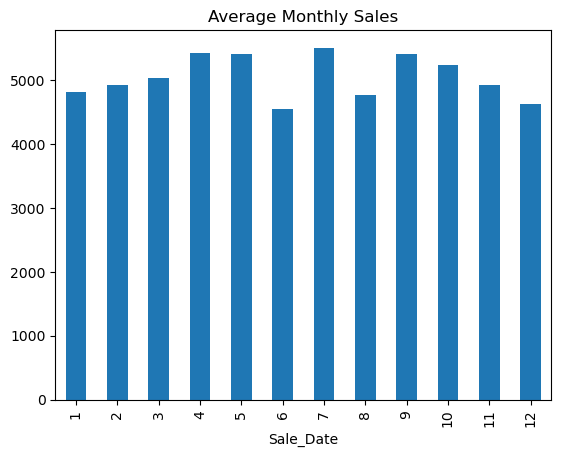

In [11]:
df["Sales_Amount"].groupby(df.index.month).mean().plot(kind="bar")
plt.title("Average Monthly Sales")
plt.show()

In [12]:
result = adfuller(df["Sales_Amount"])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -32.78741598855733
p-value: 0.0


In [14]:
N = len(df)
test_size = int(N * 0.2)

train = df["Sales_Amount"].iloc[:-test_size]
test = df["Sales_Amount"].iloc[-test_size:]

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 800
Test size: 200


In [30]:
# Split Train/Test safely
N = len(ts)

# Keep test between 14 and 30 BUT smaller than total size
test_size = min(30, max(14, N // 5))   # 20% of data, min 14, max 30

train = ts.iloc[:-test_size]
test = ts.iloc[-test_size:]

print(f"\nTrain size: {len(train)} points")
print(f"Test size: {len(test)} points")


Train size: 336 points
Test size: 30 points


In [15]:
model = ARIMA(train, order=(1,1,1))
fitted = model.fit()

print(fitted.summary())

C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Sales_Amount   No. Observations:                  800
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7491.991
Date:                Sun, 22 Feb 2026   AIC                          14989.983
Time:                        21:24:03   BIC                          15004.033
Sample:                             0   HQIC                         14995.380
                                - 800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0040      0.035      0.113      0.910      -0.065       0.073
ma.L1         -1.0000      0.079    -12.657      0.000      -1.155      -0.845
sigma2      8.102e+06   9.76e-09    8.3e+14      0.0

In [16]:
steps = len(test)
forecast = fitted.forecast(steps=steps)

forecast.index = test.index

C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print("\nModel Performance:")
print(f"RMSE = {rmse:.3f}")
print(f"MAE  = {mae:.3f}")
print(f"R²   = {r2:.3f}")


Model Performance:
RMSE = 2868.609
MAE  = 2506.951
R²   = -0.011


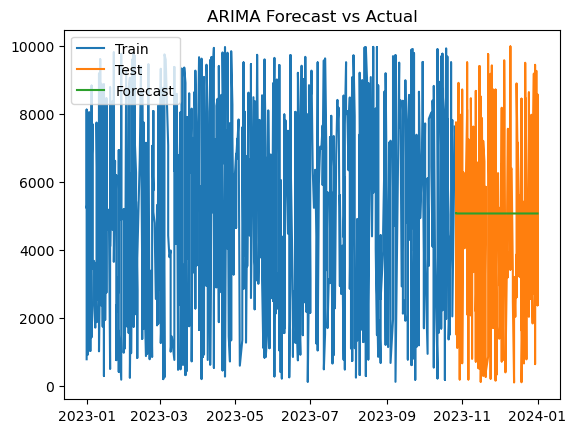

In [18]:
plt.figure()
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(forecast.index, forecast, label="Forecast")
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()